In [1]:
import ROOT as rt

Welcome to JupyROOT 6.22/08


In [3]:
MH = rt.RooRealVar("MH","mass of the Hypothetical Boson (H-boson) in GeV",125,120,130)
MH.Print()

RooRealVar::MH = 125  L(120 - 130) 


In [4]:
MH.setVal(130)
MH.getVal()

130.0

In [6]:
mass = rt.RooRealVar("m","m (GeV)",100,80,200)
sigma = rt.RooRealVar("resolution","#sigma",10,0,20)
func = rt.RooFormulaVar("R","@0/@1",rt.RooArgList(sigma,mass))
func.Print("v")

--- RooAbsArg ---
  Value State: DIRTY
  Shape State: DIRTY
  Attributes: 
  Address: 0x55943c3cd030
  Clients: 
  Servers: 
    (0x55943a99d170,V-) RooRealVar::resolution "#sigma"
    (0x55943c315650,V-) RooRealVar::m "m (GeV)"
  Proxies: 
    actualVars -> 
      1)  resolution
      2)           m
--- RooAbsReal ---

  Plot label is "R"
Batch data access not initialised.
    --- RooFormula ---
   Formula:        '@0/@1'
   Interpretation: '[resolution]/[m]'
    Servers: (resolution,m)
    In use : (resolution,m)


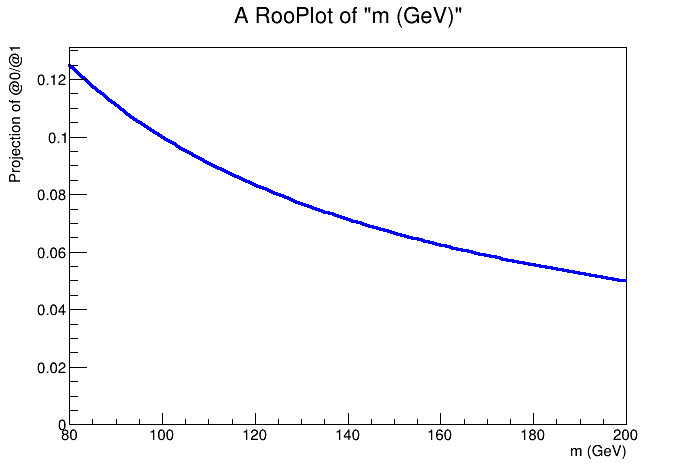

In [7]:
can = rt.TCanvas()
plot = mass.frame()
func.plotOn(plot)
plot.Draw()
can.Draw()

In [8]:
gauss = rt.RooGaussian("gauss","f(m|M_{H},#sigma)",mass,MH,sigma)
gauss.Print("V")

--- RooAbsArg ---
  Value State: DIRTY
  Shape State: DIRTY
  Attributes: 
  Address: 0x55943cf2e360
  Clients: 
  Servers: 
    (0x55943c315650,V-) RooRealVar::m "m (GeV)"
    (0x55943c265910,V-) RooRealVar::MH "mass of the Hypothetical Boson (H-boson) in GeV"
    (0x55943a99d170,V-) RooRealVar::resolution "#sigma"
  Proxies: 
    x -> m
    mean -> MH
    sigma -> resolution
--- RooAbsReal ---

  Plot label is "gauss"
Batch data access not initialised.
--- RooAbsPdf ---
Cached value = 0


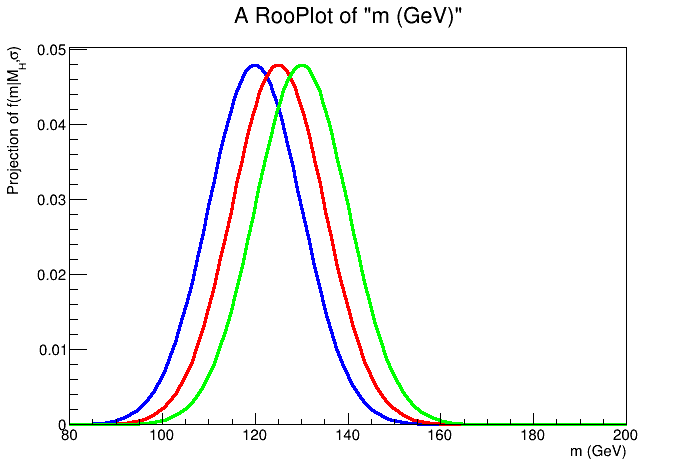

In [11]:
plot = mass.frame()
gauss.plotOn(plot)

MH.setVal(120)
gauss.plotOn(plot,rt.RooFit.LineColor(rt.kBlue))

MH.setVal(125)
gauss.plotOn(plot,rt.RooFit.LineColor(rt.kRed))

MH.setVal(135)
gauss.plotOn(plot,rt.RooFit.LineColor(rt.kGreen))

plot.Draw()
can.Update()
can.Draw()

In [12]:
gen_data = gauss.generate(rt.RooArgSet(mass),500)

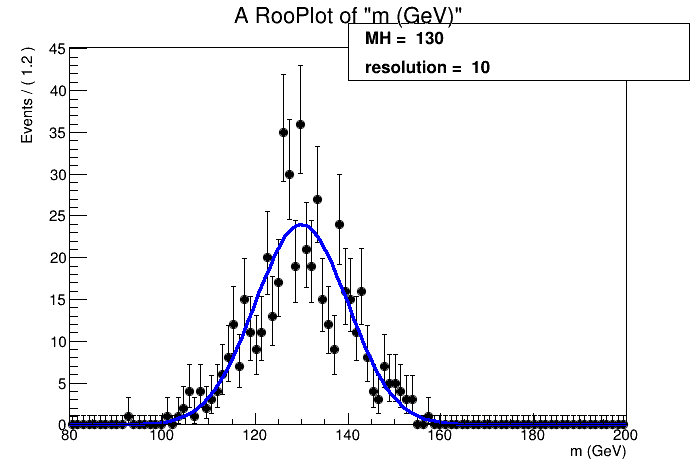

In [13]:
plot = mass.frame()
gen_data.plotOn(plot)
gauss.plotOn(plot)
gauss.paramOn(plot)
plot.Draw()
can.Update()
can.Draw()

In [14]:
mydata = rt.RooDataSet("dummy","My dummy dataset",rt.RooArgSet(mass))

In [15]:
mass.setVal(123.4);
mydata.add(rt.RooArgSet(mass));
mass.setVal(145.2);
mydata.add(rt.RooArgSet(mass));
mass.setVal(170.8);
mydata.add(rt.RooArgSet(mass));

mydata.Print();

RooDataSet::dummy[m] = 3 entries


In [19]:
file = rt.TFile.Open("tutorial.root")
file.ls()

TFile**		tutorial.root	
 TFile*		tutorial.root	
  KEY: RooWorkspace	workspace;1	Tutorial Workspace
  KEY: TProcessID	ProcessID0;1	48737500-e7e5-11e6-be6f-0d0011acbeef


In [20]:
wspace = file.Get("workspace")
wspace.Print("v")


RooWorkspace(workspace) Tutorial Workspace contents

variables
---------
(CMS_hgg_mass)

datasets
--------
RooDataSet::dataset(CMS_hgg_mass)



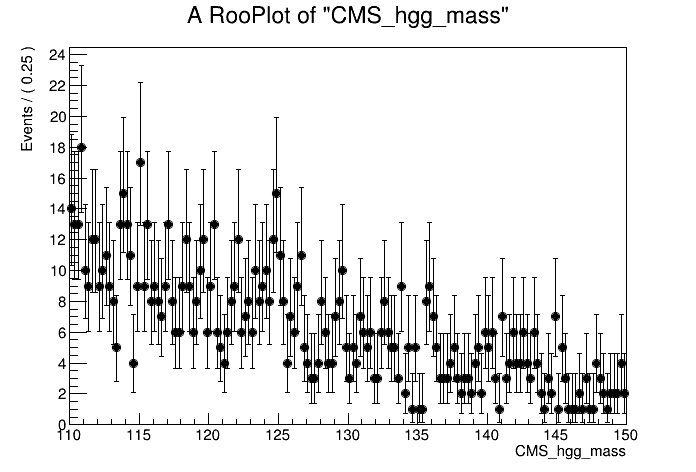

In [21]:
hgg_data = wspace.data("dataset")
hgg_mass = wspace.var("CMS_hgg_mass")

plot = hgg_mass.frame()
hgg_data.plotOn(plot,rt.RooFit.Binning(160))

hggcan = rt.TCanvas()
plot.Draw()
hggcan.Update()
hggcan.Draw()

In [22]:
alpha = rt.RooRealVar("alpha","#alpha",-0.05,-0.2,0.01)
expo = rt.RooExponential("exp","exponential function",hgg_mass,alpha)

In [23]:
nll = expo.createNLL(hgg_data)
nll.Print("v")

--- RooAbsArg ---
  Value State: DIRTY
  Shape State: DIRTY
  Attributes: 
  Address: 0x55943e2fe2a0
  Clients: 
  Servers: 
    (0x55943e29b580,V-) RooRealVar::alpha "#alpha"
  Proxies: 
    paramSet -> 
      1)  alpha
--- RooAbsReal ---

  Plot label is "nll_exp_dataset"
Batch data access not initialised.


In [24]:
minim = rt.RooMinimizer(nll)
minim.minimize("Minuit2","migrad")

0

Minuit2Minimizer: Minimize with max-calls 500 convergence for edm < 1 strategy 1
MnSeedGenerator: for initial parameters FCN = 3589.523783921
MnSeedGenerator: Initial state:   - FCN =   3589.523783921 Edm =      4.72158 NCalls =      5
VariableMetric: start iterating until Edm is < 0.001
VariableMetric: Initial state   - FCN =   3589.523783921 Edm =      4.72158 NCalls =      5
VariableMetric: Iteration #   0 - FCN =   3589.523783921 Edm =      4.72158 NCalls =      5
VariableMetric: Iteration #   1 - FCN =   3584.690064829 Edm =   0.00671004 NCalls =      8
VariableMetric: Iteration #   2 - FCN =   3584.682732166 Edm =  8.23193e-09 NCalls =     12
VariableMetric: After Hessian   - FCN =   3584.682732166 Edm =   7.2245e-09 NCalls =     19
VariableMetric: Iteration #   3 - FCN =   3584.682732166 Edm =   7.2245e-09 NCalls =     19
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 3584.68273216570196
Edm   = 7.2245039767447717e-09
Nfcn  = 19
alpha	  = -0.0408262	 +/-  0.00291959	(limi

In [25]:
alpha.Print("v")

--- RooAbsArg ---
  Value State: clean
  Shape State: clean
  Attributes: 
  Address: 0x55943e29b580
  Clients: 
    (0x55943e2ece90,V-) RooExponential::exp "exponential function"
    (0x55943e2fe2a0,V-) RooNLLVar::nll_exp_dataset "-log(likelihood)"
    (0x55943e32bf80,V-) RooExponential::exp "exponential function"
    (0x55943e2ed390,V-) RooRealIntegral::exp_Int[CMS_hgg_mass] "Integral of exponential function"
  Servers: 
  Proxies: 
--- RooAbsReal ---

  Plot label is "alpha"
Batch data access not initialised.
--- RooAbsRealLValue ---
  Fit range is [ -0.2 , 0.01 ]
--- RooRealVar ---
  Error = 0.00291959


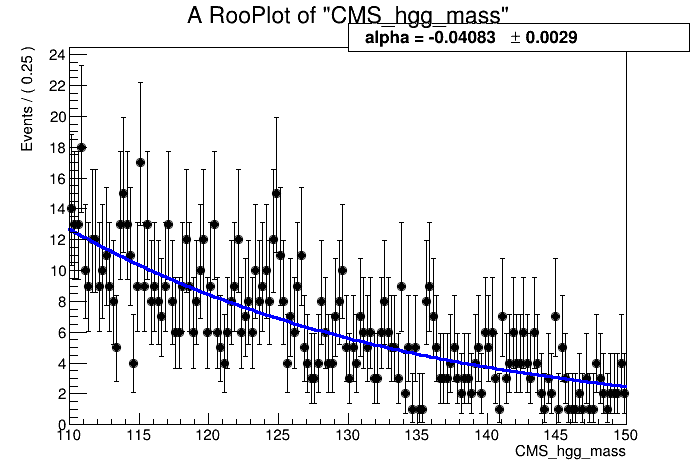

In [26]:
expo.plotOn(plot)
expo.paramOn(plot)
plot.Draw()
hggcan.Update()
hggcan.Draw()

In [27]:
sigma.setVal(1)
sigma.setConstant()
MH.setVal(125)
MH.setConstant()
hgg_signal = rt.RooGaussian("signal","Gaussian PDF",hgg_mass,MH,sigma)

In [28]:
norm_s = rt.RooRealVar("norm_s","N_{s}",10,100)
norm_b = rt.RooRealVar("norm_b","N_{b}",0,1000)
components = rt.RooArgList(hgg_signal,expo)
coeffs = rt.RooArgList(norm_s,norm_b)
model = rt.RooAddPdf("model","f_{s+b}",components,coeffs)
model.Print("v")

--- RooAbsArg ---
  Value State: DIRTY
  Shape State: DIRTY
  Attributes: 
  Address: 0x55943e5171e0
  Clients: 
  Servers: 
    (0x55943e5416a0,V-) RooGaussian::signal "Gaussian PDF"
    (0x55943e50cd00,V-) RooRealVar::norm_s "N_{s}"
    (0x55943e2ece90,V-) RooExponential::exp "exponential function"
    (0x55943e5582f0,V-) RooRealVar::norm_b "N_{b}"
  Proxies: 
    !refCoefNorm -> 
    !pdfs -> 
      1)  signal
      2)     exp
    !coefficients -> 
      1)  norm_s
      2)  norm_b
--- RooAbsReal ---

  Plot label is "model"
Batch data access not initialised.
--- RooAbsPdf ---
Cached value = 0


[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (signal)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (exp)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha       -4.08262e-02  2.91959e-03   -2.00000e-01  1.00000e-02
     2 norm_b       5.00000e+02  1.00000e+02    0.00000e+00  1.00000e+03
     3 norm_s       5.50000e+01  9.00000e+00    1.00000e+01  1.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1500           

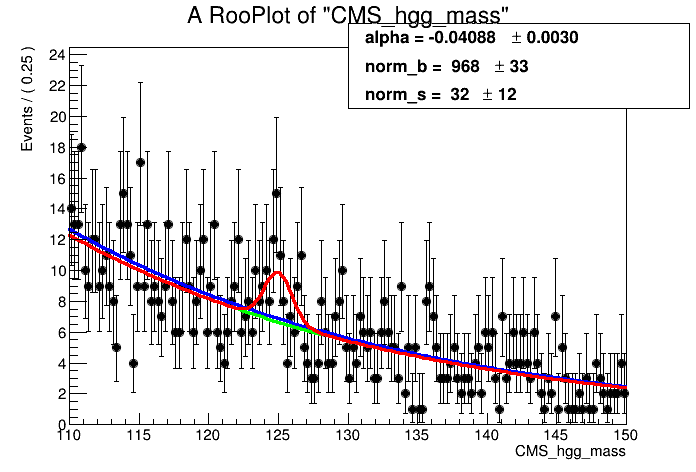

In [29]:
model.fitTo(hgg_data,rt.RooFit.Extended())

model.plotOn(plot,rt.RooFit.Components("exp"),rt.RooFit.LineColor(rt.kGreen))
model.plotOn(plot,rt.RooFit.LineColor(rt.kRed));
model.paramOn(plot);

hggcan.Clear();
plot.Draw();
hggcan.Update();
hggcan.Draw();

In [31]:
MH.setConstant(False)
model.fitTo(hgg_data,rt.RooFit.Extended())

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (signal,exp)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 MH           1.25000e+02  1.00000e+00    1.20000e+02  1.30000e+02
     2 alpha       -4.08793e-02  2.96856e-03   -2.00000e-01  1.00000e-02
     3 norm_b       9.67647e+02  3.25747e+01    0.00000e+00  1.00000e+03
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 BROUGHT BACK INSIDE LIMITS.
     4 norm_s       3.22534e+01  1.16433e+01    1.00000e+01  1.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 

In [32]:
fit_res = model.fitTo(hgg_data,rt.RooFit.Extended(),rt.RooFit.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (signal,exp)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 MH           1.24628e+02  3.98106e-01    1.20000e+02  1.30000e+02
     2 alpha       -4.07708e-02  2.97195e-03   -2.00000e-01  1.00000e-02
     3 norm_b       9.66105e+02  3.26003e+01    0.00000e+00  1.00000e+03
     4 norm_s       3.39026e+01  1.17445e+01    1.00000e+01  1.00000e+02
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD        2000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW S

In [34]:
cormat = fit_res.correlationMatrix()
cormat.Print()


4x4 matrix is as follows

     |      0    |      1    |      2    |      3    |
---------------------------------------------------------
   0 |          1    -0.03282    0.009538    -0.02623 
   1 |   -0.03282           1   -0.001978    0.005439 
   2 |   0.009538   -0.001978           1     -0.2769 
   3 |   -0.02623    0.005439     -0.2769           1 



In [39]:
imp = getattr(wspace,'import')
imp(model)
params = model.getParameters(hgg_data)
wspace.saveSnapshot("nominal values",params)

wspace.Print("v")

[#1] INFO:ObjectHandling -- RooWorkspace::import(workspace) importing RooAddPdf::model
[#1] INFO:ObjectHandling -- RooWorkspace::import(workspace) importing RooGaussian::signal
[#1] INFO:ObjectHandling -- RooWorkspace::import(workspace) importing RooRealVar::MH
[#1] INFO:ObjectHandling -- RooWorkspace::import(workspace) importing RooRealVar::resolution
[#1] INFO:ObjectHandling -- RooWorkspace::import(workspace) importing RooRealVar::norm_s
[#1] INFO:ObjectHandling -- RooWorkspace::import(workspace) importing RooExponential::exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(workspace) importing RooRealVar::alpha
[#1] INFO:ObjectHandling -- RooWorkspace::import(workspace) importing RooRealVar::norm_b

RooWorkspace(workspace) Tutorial Workspace contents

variables
---------
(CMS_hgg_mass,MH,alpha,norm_b,norm_s,resolution)

p.d.f.s
-------
RooExponential::exp[ x=CMS_hgg_mass c=alpha ] = 0.00248636
RooAddPdf::model[ norm_s * signal + norm_b * exp ] = 0.00240205
RooGaussian::signal[ x=CMS

In [41]:
w = rt.RooWorkspace("w")
w.factory('expr::n("mu*s +b", mu[1.0,0,4], s[5],b[8.1])')
w.factory('Poisson::poisN(N[15],n)')
w.factory('expr::NLL("-log(@0)",poisN)')

nll = w.function("NLL")
minim = rt.RooMinimizer(nll)
minim.setErrorLevel(0.5)
minim.minimize("Minuit2","migrad")
bestfitnll = nll.getVal()

[#1] INFO:Minization -- RooFormulaVar::defaultErrorLevel(NLL) WARNING: Formula contains neither RooNLLVar nor RooChi2Var server, using default level of 1.0
Minuit2Minimizer: Minimize with max-calls 500 convergence for edm < 1 strategy 1
MnSeedGenerator: for initial parameters FCN = 2.410087930734
MnSeedGenerator: Initial state:   - FCN =   2.410087930734 Edm =     0.135301 NCalls =      5
VariableMetric: start iterating until Edm is < 0.001
VariableMetric: Initial state   - FCN =   2.410087930734 Edm =     0.135301 NCalls =      5
VariableMetric: Iteration #   0 - FCN =   2.410087930734 Edm =     0.135301 NCalls =      5
VariableMetric: Iteration #   1 - FCN =   2.278667147527 Edm =  0.000153556 NCalls =      8
VariableMetric: After Hessian   - FCN =   2.278667147527 Edm =  0.000148888 NCalls =     13
VariableMetric: Iteration #   2 - FCN =   2.278667147527 Edm =  0.000148888 NCalls =     13
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 2.27866714752699728
Edm   = 0.00014888822

In [43]:
w.factory('expr::n("mu*s*pow(1.025,lumi) +b*pow(1.025,lumi)", mu[1.0,0,4], s[5],b[8.1],lumi[0,-4,4])')
w.factory('Gaussian::lumiconstr(lumi,0,1)')
w.factory('PROD::likelihood(poisN,lumiconstr)')
w.factory('expr::NLL("-log(@0)",likelihood)')

nll = w.function("NLL")
minim = rt.RooMinimizer(nll)
minim.setErrorLevel(0.5)
minim.minimize("Minuit2","migrad")
bestfitnll = nll.getVal()

[#1] INFO:ObjectHandling -- RooWorkSpace::import(w) Recycling existing object mu created with identical factory specification
[#1] INFO:ObjectHandling -- RooWorkSpace::import(w) Recycling existing object s created with identical factory specification
[#1] INFO:ObjectHandling -- RooWorkSpace::import(w) Recycling existing object b created with identical factory specification
[#0] ERROR:ObjectHandling -- RooWorkSpace::import(w) ERROR importing object named n: another instance with same name already in the workspace and no conflict resolution protocol specified
[#0] ERROR:ObjectHandling -- RooFactoryWSTool::processExpression() ERRORS detected, transaction to workspace aborted, no objects committed
[#0] ERROR:ObjectHandling -- RooFactoryWSTool::createArg() ERROR constructing RooGaussian::lumiconstr: RooAbsReal named lumi not found
[#0] ERROR:ObjectHandling -- RooFactoryWSTool::processExpression() ERRORS detected, transaction to workspace aborted, no objects committed
[#0] ERROR:ObjectHandli